In [194]:
library(wesanderson)
library(ggrepel)
library(data.table)
library(dplyr)
library(svglite)

In [195]:
### Initial colors
# Mouse
colors <- c(
    'ES-derived neurons' = '#53734c', #
    'Stem-like cells' = 'dimgrey', #
    'Fetal neurons' = '#9c2725', #
    'Post-mortem neurons' = '#034e91', #
    'Fetal ES-derived neurons' = '#764e3f',
    'Fetal NPC' = '#009aa3',
    'Fetal stem-like cells'='#9ca316'
)
   
#Human
colors <- c(
    'iPSC-derived neurons' = '#469433',
    'Stem-like cells' = 'dimgrey',
    'Fetal neurons' = '#9c2725',
    'Post-mortem neurons' = '#034e91',
    'Post-mortem non-neurons' = '#764e3f',
    'iPSC-derived glia' = '#ffa500',
    "Primary neurons"="#77658c"
)

#Novel colors

colors_updated <- c(
    'iPSC-derived neurons' = '#469433',
    'Stem-like cells' = 'dimgrey',
    'Fetal neurons' = '#9c4746',
    'Post-mortem neurons' = '#034e91',
    'Post-mortem non-neurons' = '#a86432',
    'iPSC-derived glia' = '#d18c5a',
    "Primary neurons"="#77658c",
    'ES-derived neurons' = '#53734c', #
    'Fetal ES-derived neurons' = '#8c5857',
    'Fetal NPC' = '#d4adab',
    'Fetal stem-like cells'='#967978'
)





In [214]:
colors <- c(
    'Fetal neurons' = '#a85858',
    'Fetal ES-derived neurons' = '#8c5857',
    'Fetal NPC' = '#d4adab',
    'Fetal stem-like cells'='#967978',
    'iPSC-derived neurons' = '#469433',
    'Stem-like cells' = 'dimgrey',    
    'Post-mortem neurons' = '#034e91',
    'Post-mortem non-neurons' = '#a87963',
    'iPSC-derived glia' = '#d18c5a',
    "Primary neurons"="#77658c",
    'ES-derived neurons' = '#53734c'
    
)
shapes <- c(
    'Fetal neurons' = 16,
    'Fetal ES-derived neurons' = 25,
    'Fetal NPC' = 18,
    'Fetal stem-like cells' = 17,
    'iPSC-derived neurons' = 16,
    'Stem-like cells' = 16,    
    'Post-mortem neurons' = 16,
    'Post-mortem non-neurons' = 16,
    'iPSC-derived glia' = 18,
    "Primary neurons" = 16,
    'ES-derived neurons' = 18
)

sizes <- c(
    'Fetal neurons' = 3.5,
    'Fetal ES-derived neurons' = 3.5,
    'Fetal NPC' = 3.5,
    'Fetal stem-like cells' = 3.5,
    'iPSC-derived neurons' = 3.5,
    'Stem-like cells' = 3.5,    
    'Post-mortem neurons' = 3.5,
    'Post-mortem non-neurons' = 3.5,
    'iPSC-derived glia' = 3.5,
    "Primary neurons" = 3.5,
    'ES-derived neurons' = 3.5
)

## Figure 1 - main PCA

### Mouse IS


In [146]:
plot_pca_final_groups_mouse <- function(d1, plot_name, pc1_var, pc2_var) {  
    d1$sample <- d1$sample_simple
    d1$simple_group <- factor(d1$simple_group)    
    num_groups <- length(unique(d1$simple_group))
    sample_simple <- d1$sample_simple 
    
    # shapes <- c(16, 16, 16,16, 16, 16, 16) 
    # sizes <- c(3.5, 3.5, 3.5,  3.5, 3.5, 3.5, 3.5) 
    
    if (num_groups > length(colors)) {
      stop("Not enough colors provided for the number of groups")
    }
    
    p_mouse <- ggplot(data = d1, aes(x = PC1, y = PC2, color = simple_group)) +
      geom_point(aes(shape = simple_group, size = simple_group)) +
      scale_shape_manual(values = shapes) +
      scale_size_manual(values = sizes) +
      xlab(paste0("PC1 ", pc1_var, "%")) + 
      ylab(paste0("PC2 ", pc2_var, "%")) +
      stat_ellipse(aes(fill = simple_group), geom = "polygon", alpha = 0.1, show.legend = FALSE) +
      scale_color_manual(values = colors) +
      scale_fill_manual(values = colors) +
      theme_minimal() +
      theme(axis.text = element_text(size = 16, family = 'Helvetica'),
            axis.title = element_text(size = 24, family = 'Helvetica')) +
      geom_hline(yintercept = 0, linetype = 'dashed', color = 'darkgrey') +
      geom_vline(xintercept = 0, linetype = 'dashed', color = 'darkgrey')
    
    name = sprintf("/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/%s", plot_name)
    print(name)
    ggsave(name, plot = p_mouse, width = 8.1, height = 6)
    return(p_mouse)
}



[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/insulation_PCA_mouse_data.pdf"


Too few points to calculate an ellipse
Too few points to calculate an ellipse


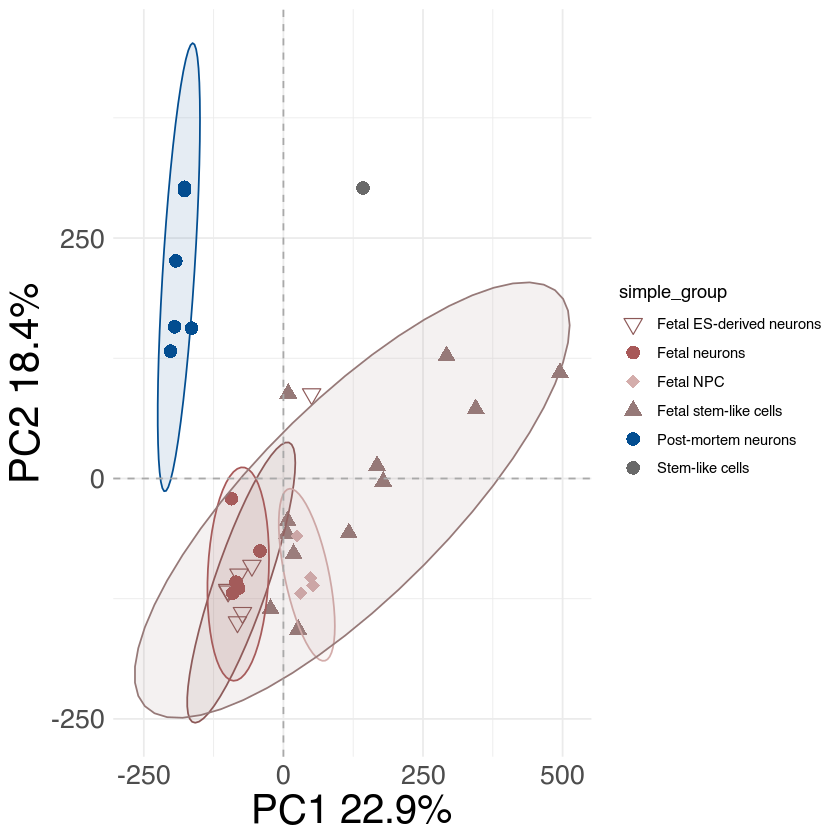

In [218]:
df_mouse <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/2_tads/tads_additional_files/main_files_tads_mouse/mouse_pca_is_221024.tsv', sep='\t')
pca_mouse <- plot_pca_final_groups_mouse(df_mouse, "insulation_PCA_mouse_data.pdf", 22.9 , 18.4)
pca_mouse

### Mouse expression


[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/expression_PCA_mouse_data.pdf"


Too few points to calculate an ellipse
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”
Too few points to calculate an ellipse
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”


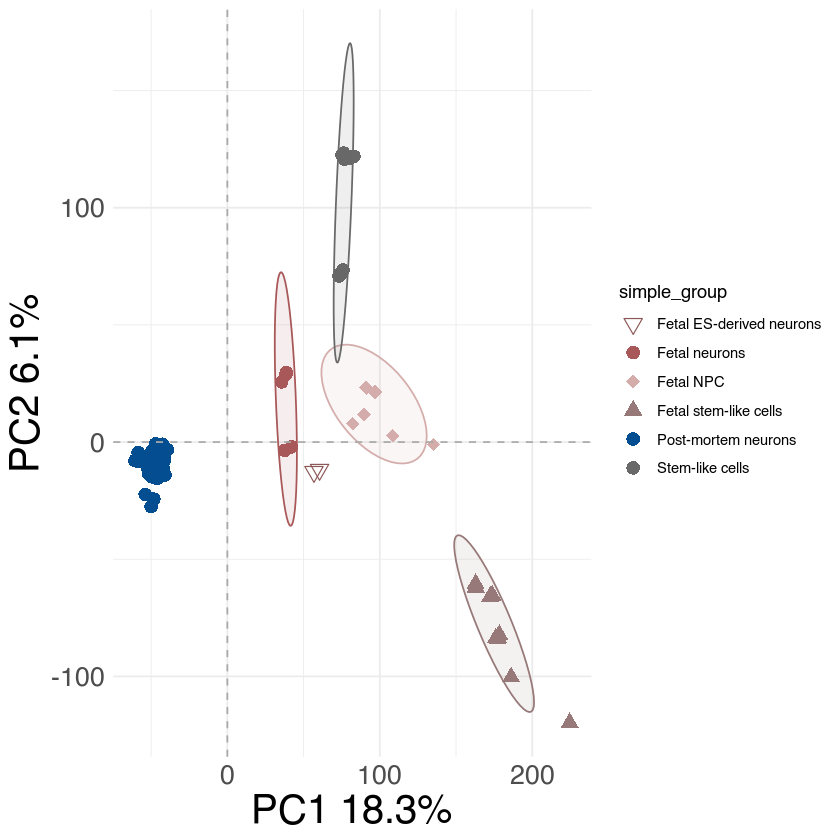

In [229]:
df_mouse_expression <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/pca_data/PCA_expression_mouse_data.tsv', sep='\t')
pca_mouse_exp <- plot_pca_final_groups_mouse(df_mouse_expression, "expression_PCA_mouse_data.pdf", 18.3 , 6.1)
pca_mouse_exp


### Human IS

In [184]:
plot_pca_final_groups_human <- function(d1, plot_name, pc1_var, pc2_var) {  
    d1$group <- factor(d1$group)    
    num_groups <- length(unique(d1$group))

        
    if (num_groups > length(colors)) {
      stop("Not enough colors provided for the number of groups")
    }
    
    p1 <- ggplot(data = d1, aes(x = PC1, y = PC2, color = group)) +
      geom_point(aes(shape = group, size = group)) +
      scale_shape_manual(values = shapes) +
      scale_size_manual(values = sizes) +
      xlab(paste0("PC1 ", pc1_var, "%")) + 
      ylab(paste0("PC2 ", pc2_var, "%")) +
      stat_ellipse(aes(fill = group), geom = "polygon", alpha = 0.1, show.legend = FALSE) +
      scale_color_manual(values = colors) +
      scale_fill_manual(values = colors) +
      theme_minimal() +
      theme(axis.text = element_text(size = 16, family = 'Helvetica'),
            axis.title = element_text(size = 24, family = 'Helvetica')) +
      geom_hline(yintercept = 0, linetype = 'dashed', color = 'darkgrey') +
      geom_vline(xintercept = 0, linetype = 'dashed', color = 'darkgrey')
    
    name = sprintf("/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/%s", plot_name)
    print(name)
    ggsave(name, plot = p1, device = cairo_pdf, width = 8.1, height = 6)
    return(p1)
}



In [208]:
df_human <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/2_tads//tads_additional_files/main_files_tads/insulation_PCA_data_15res_150wind_3maincomponents_tads_all_withTitus.tsv', sep='\t')
dim(df_human)


[1] 45  9

[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/insulation_PCA_data_TEST.pdf"


Too few points to calculate an ellipse
Too few points to calculate an ellipse


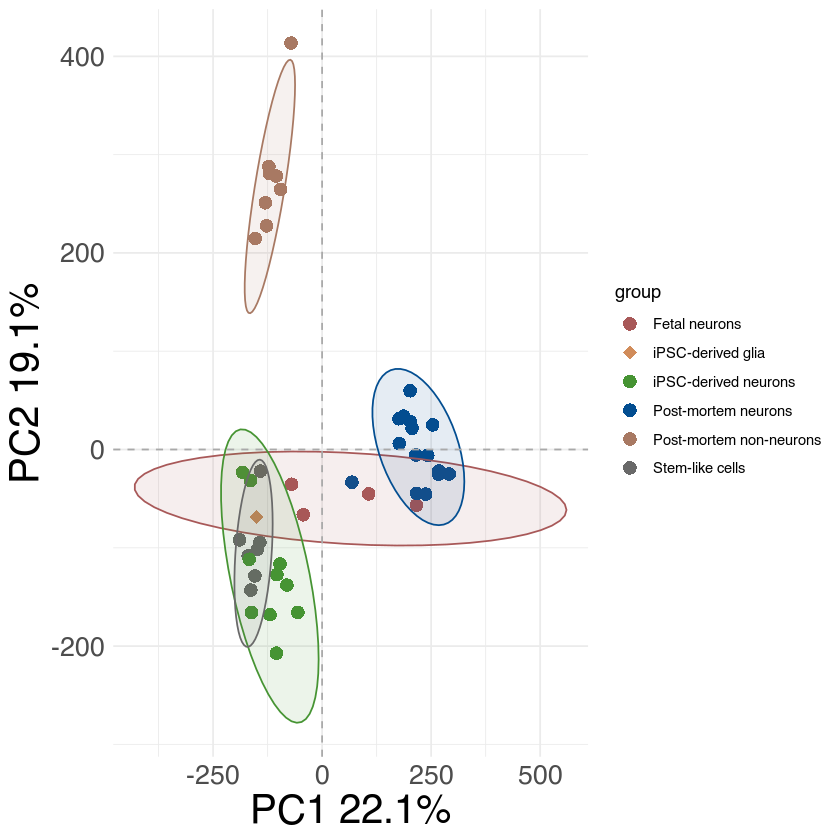

In [149]:
df_human <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/2_tads//tads_additional_files/main_files_tads/insulation_PCA_data_15res_150wind_3maincomponents_tads_all_withTitus.tsv', sep='\t')
pca_human <- plot_pca_final_groups_human(df_human, "insulation_PCA_data_TEST.pdf", 22.1 , 19.1)
pca_human

### Human expression

[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/expression_PCA_test.pdf"


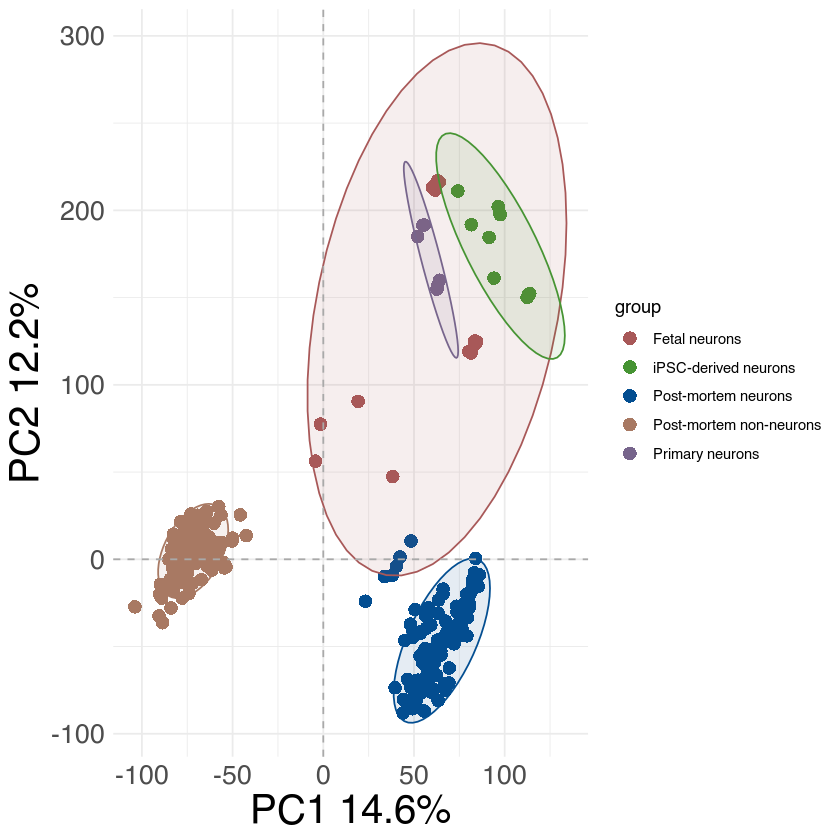

In [150]:
df_human_expression <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/pca_data/PCA_expression_data.tsv', sep='\t')
pca_human_expression <- plot_pca_final_groups_human(df_human_expression, "expression_PCA_test.pdf", 14.6 , 12.2)
pca_human_expression

### Human compartments

[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/compartment_PCA_test.pdf"


Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse


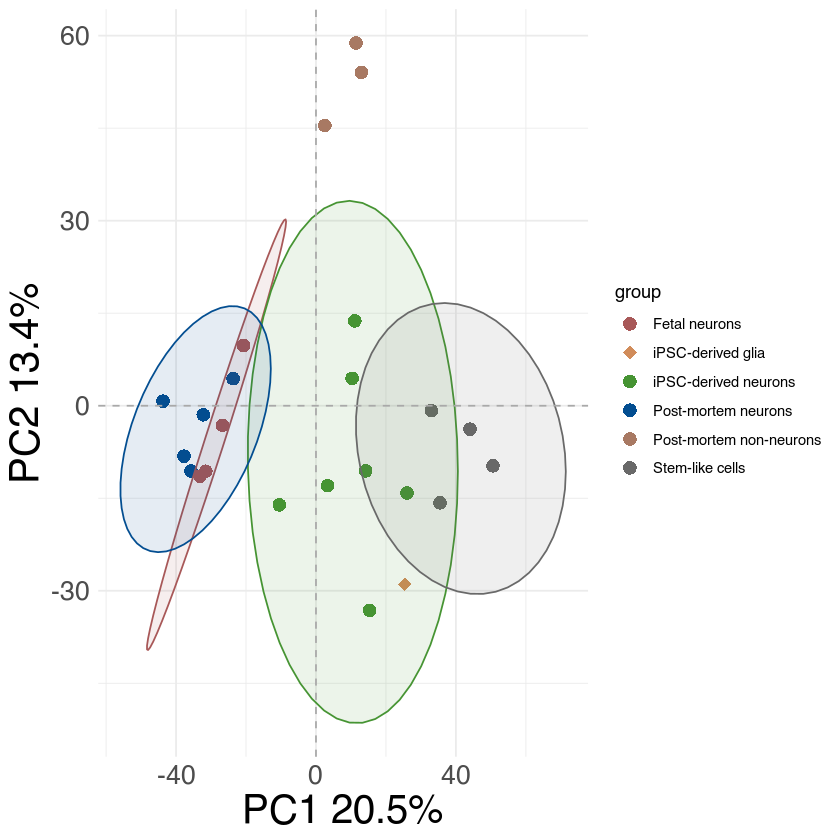

In [216]:
df_human_compartment <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/pca_data/compartment_pca.tsv', sep='\t')
pca_human_compartment <- plot_pca_final_groups_human(df_human_compartment, "compartment_PCA_test.pdf", 20.5 , 13.4)
pca_human_compartment

## Figure N - Loops

In [200]:
plot_pca_final_groups_human_withNames <- function(d1, plot_name, pc1_var, pc2_var) {  
    d1$group <- factor(d1$Group)    
    num_groups <- length(unique(d1$Group))

        
    if (num_groups > length(colors)) {
      stop("Not enough colors provided for the number of groups")
    }
    
    p1 <- ggplot(data = d1, aes(x = PC1, y = PC2, color = Group)) +
      geom_point(aes(shape = Group, size = Group)) +
      scale_shape_manual(values = shapes) +
      scale_size_manual(values = sizes) +
      xlab(paste0("PC1 ", pc1_var, "%")) + 
      ylab(paste0("PC2 ", pc2_var, "%")) +
      stat_ellipse(aes(fill = Group), geom = "polygon", alpha = 0.1, show.legend = FALSE) +
      scale_color_manual(values = colors) +
      scale_fill_manual(values = colors) +
      theme_minimal() +
      theme(axis.text = element_text(size = 12, family = 'Helvetica'),
            axis.title = element_text(size = 14, family = 'Helvetica')) +
      geom_hline(yintercept = 0, linetype = 'dashed', color = 'darkgrey') +
      geom_vline(xintercept = 0, linetype = 'dashed', color = 'darkgrey')

    p11 <- p1 + geom_text_repel(aes(label = Simple_Name), force = 10, point.padding = 0.35, show.legend = TRUE)
    
    name = sprintf("/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/%s", plot_name)
    print(name)
    ggsave(name, plot = p11, width = 8.1, height = 6)
    return(p11)
}



[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/loops_PCA_all_data2.pdf"


[1] 2

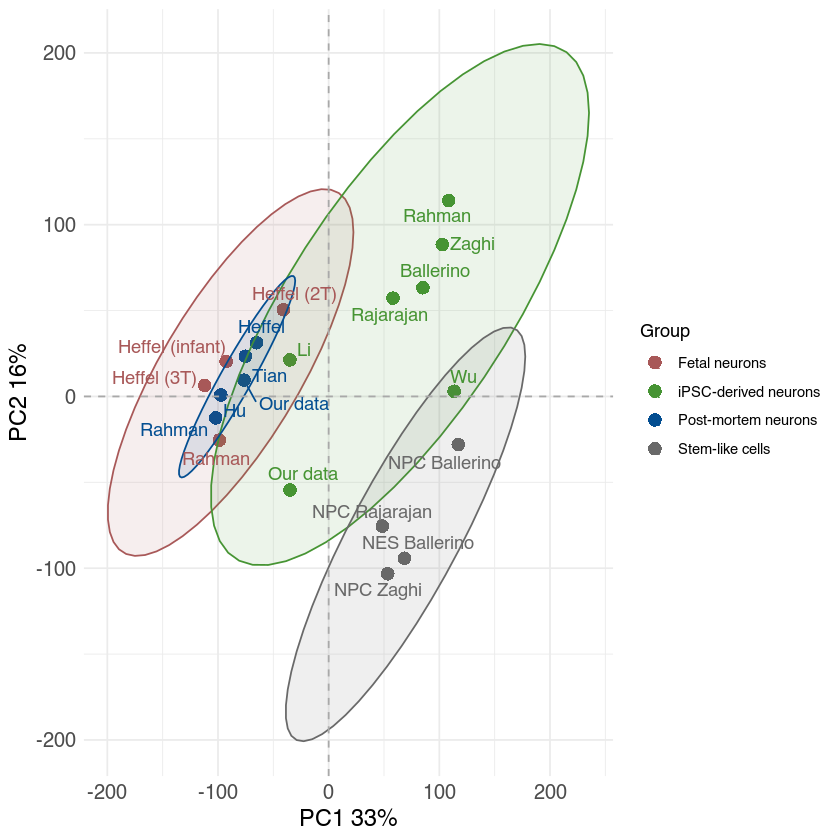

In [215]:
df_loops_all <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/1_loops/loops_additional_files/loops_clustering_all_groups_noLu_PCA_clusters_median_final_withNames.tsv', sep='\t')
pca_loops_all <- plot_pca_final_groups_human_withNames(df_loops_all, "loops_PCA_all_data.pdf", 33, 16)
pca_loops_all

[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/loops_PCA_post_mortem_vs_iPSC_derived_data.pdf"


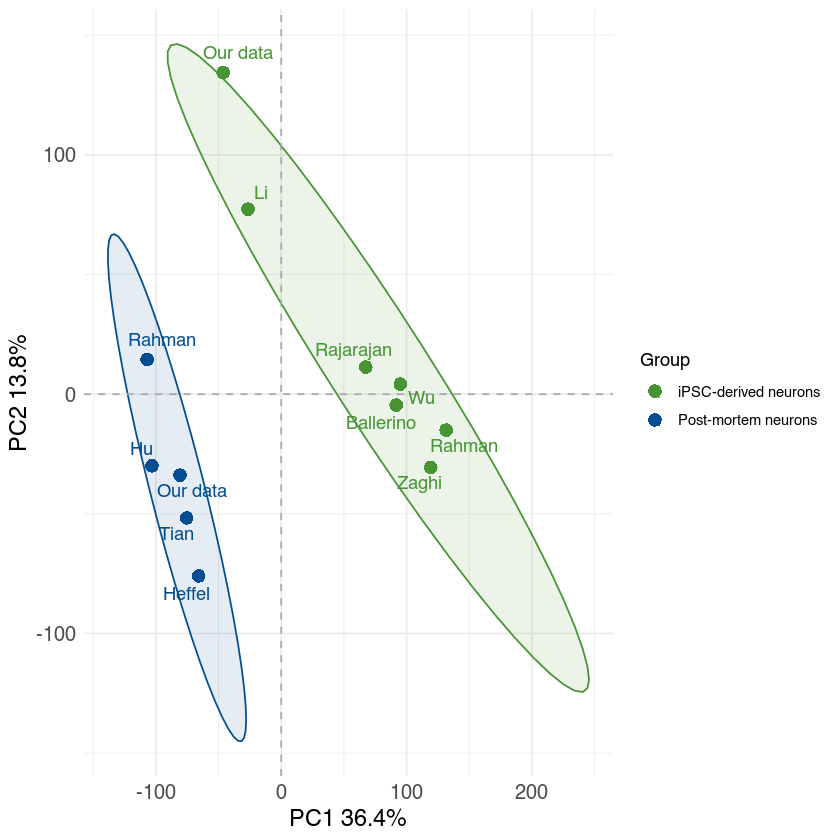

In [205]:


df_loops_all <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/1_loops/loops_additional_files/loops_clustering_post_mortem_vs_iPSC_derived_PCA_clusters_median_final_withNames.tsv', sep='\t')
pca_loops_all <- plot_pca_final_groups_human_withNames(df_loops_all, "loops_PCA_post_mortem_vs_iPSC_derived_data.pdf", 36.4, 13.8)
pca_loops_all


### Human TAD borders

[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/tads_borders_PCA_all_data.pdf"


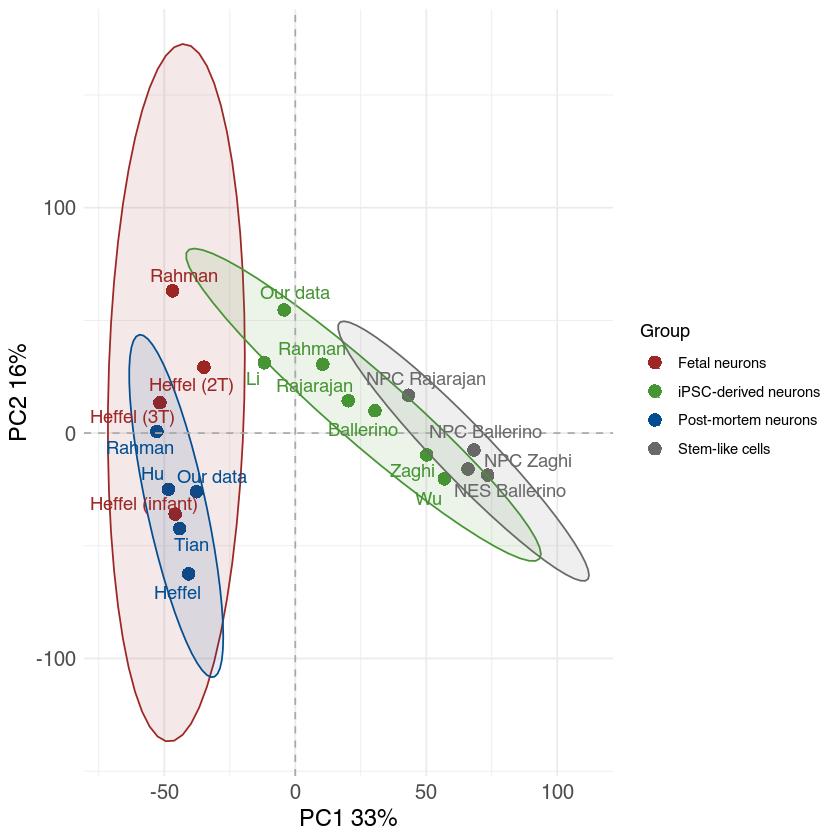

In [211]:
df_tads_all <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/2_tads/tads_additional_files/main_files_tads/tads_clustering_all_withNames.tsv', sep='\t')
pca_tads_borders_all <- plot_pca_final_groups_human_withNames(df_tads_all, "tads_borders_PCA_all_data.pdf", 33, 16)
pca_tads_borders_all



[1] "/tank/projects/diana_hic/cultures_vs_postmortem/6_additional_elements/paper_figures_1/tads_borders_PCA_postmortem_ipscderived_data.pdf"


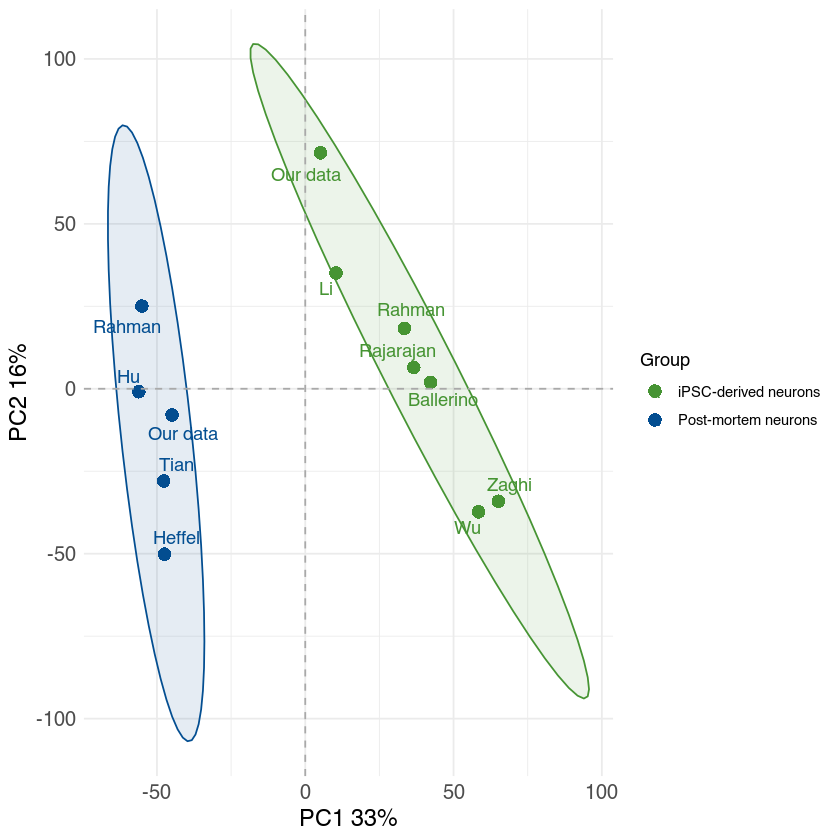

In [212]:
df_tads_Pm_ipscDer <- fread('/tank/projects/diana_hic/cultures_vs_postmortem/2_tads/tads_additional_files/main_files_tads/tads_clustering_postmortem_ipscderived_withNames.tsv', sep='\t')
pca_df_tads_Pm_ipscDer <- plot_pca_final_groups_human_withNames(df_tads_Pm_ipscDer, "tads_borders_PCA_postmortem_ipscderived_data.pdf", 33, 16)
pca_df_tads_Pm_ipscDer

